In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
file = files.upload()

Saving district_wise_rainfall_normal.csv to district_wise_rainfall_normal.csv


In [ ]:
file = files.upload()

Saving rainfall_in_india_1901-2015.csv to rainfall_in_india_1901-2015.csv


In [ ]:
data = pd.read_csv("rainfall_in_india_1901-2015.csv", sep=",")
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtypes: flo

In [ ]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.569044,35.896396,46.925176,67.798192,123.189974,234.568120,269.310313,188.678707,135.309591,99.434452,68.593545,42.318098,900.986632,59.265023,201.096692,706.881054,166.678751
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.450000,4.100000,24.200000,574.375000,34.200000
50%,1958.000000,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.900000,259.500000,174.100000,65.750000,9.700000,3.100000,1125.450000,19.300000,75.200000,882.250000,98.800000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.700000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


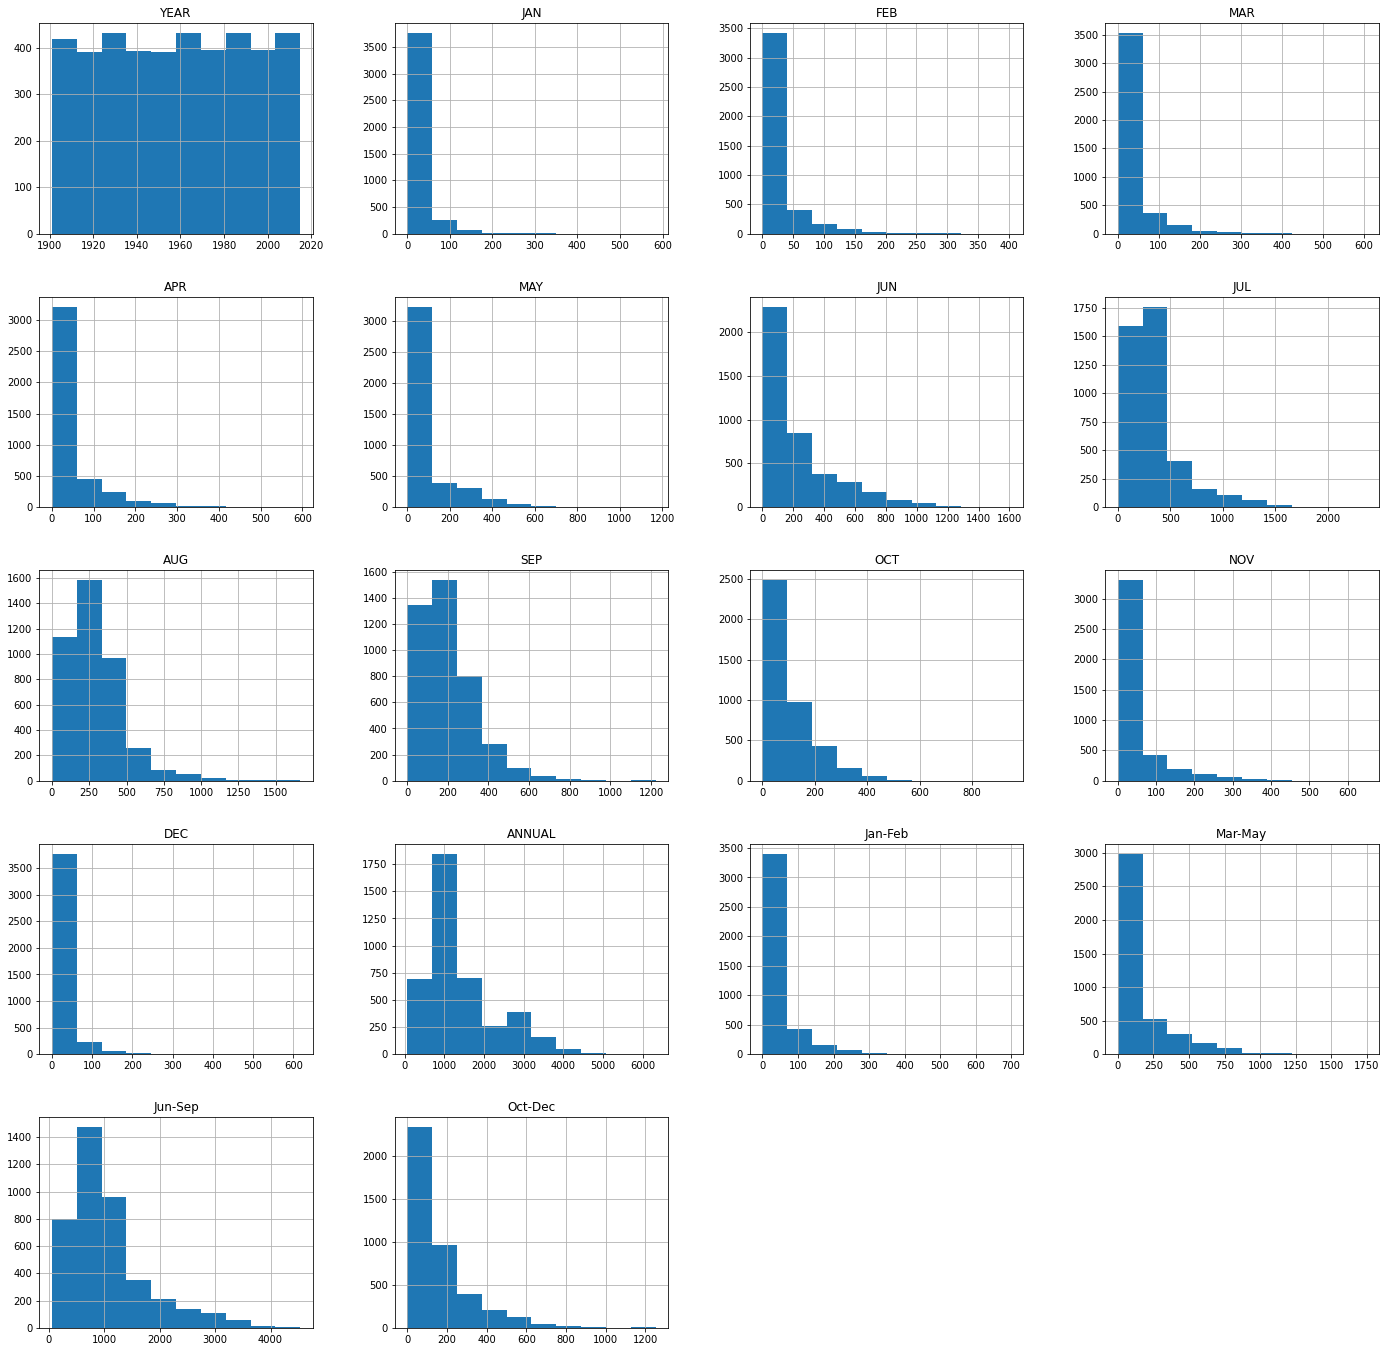

In [ ]:
data.hist(figsize=(24,24));

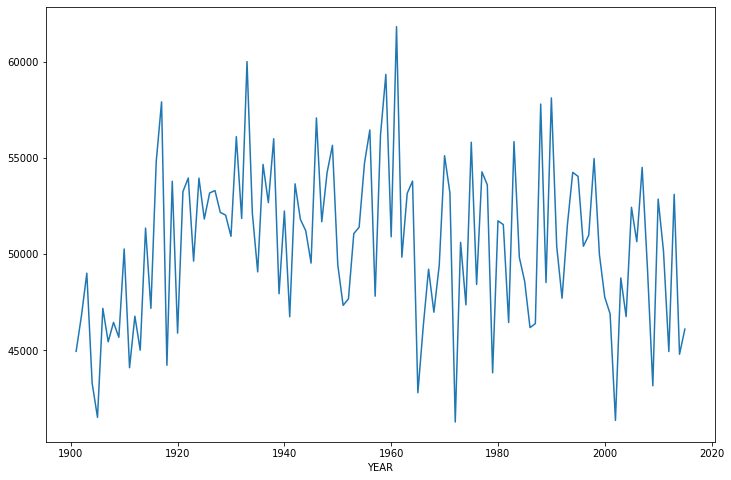

In [ ]:
data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));


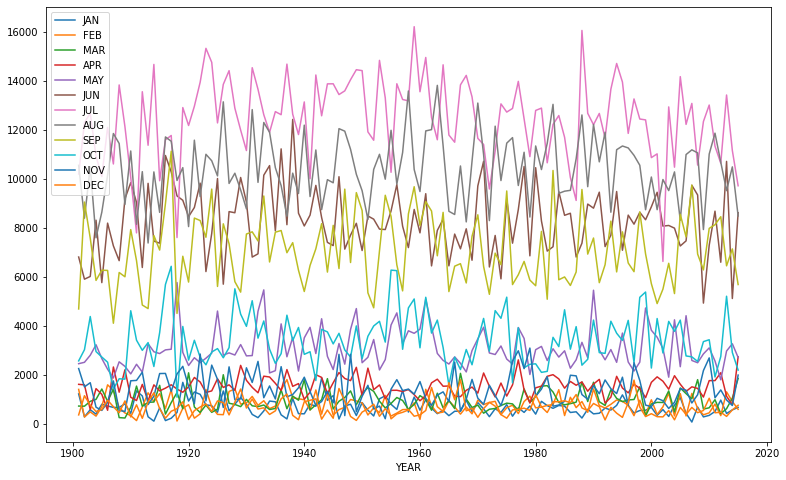

In [ ]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8));

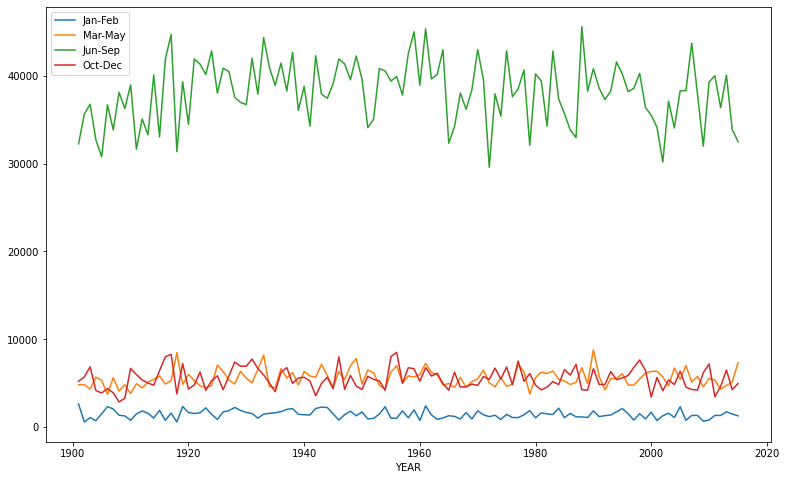

In [ ]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8));

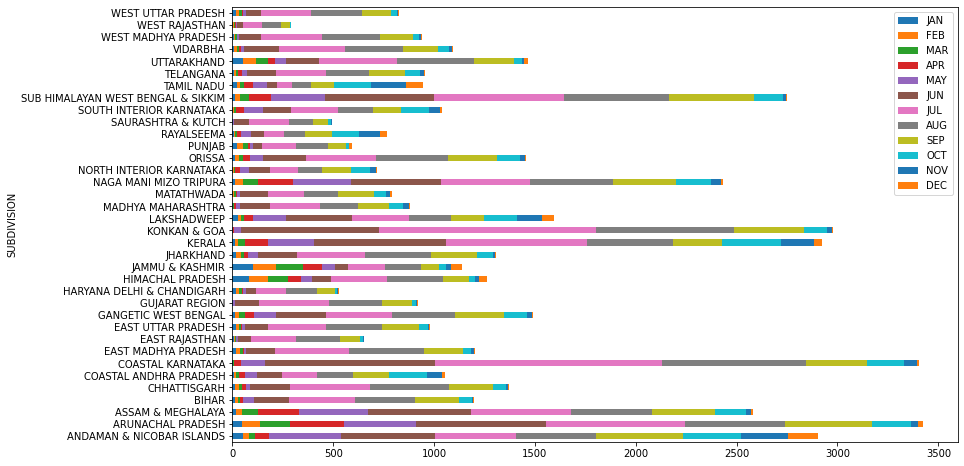

In [ ]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

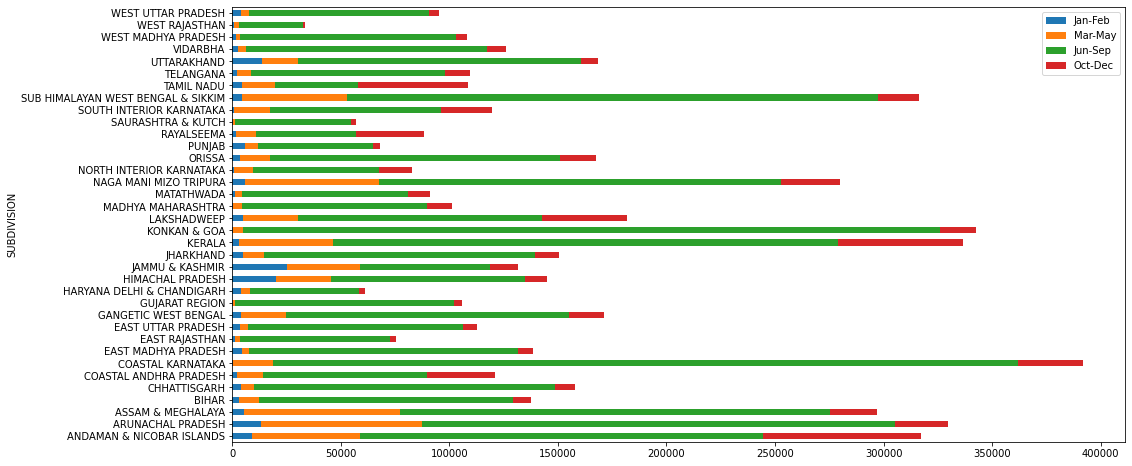

In [ ]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

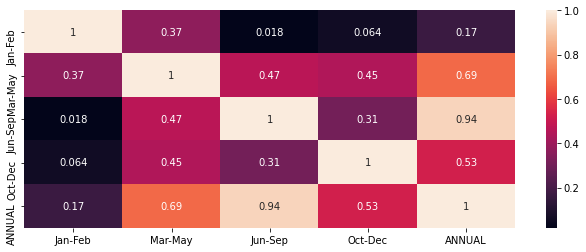

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

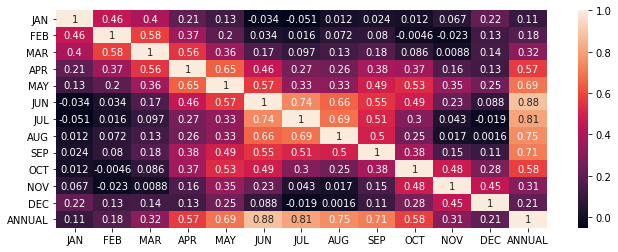

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [ ]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

In [ ]:
# seperation of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#test 2010
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]

data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)

In [ ]:
#test 2005
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2005]

data_2005 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2005 = None; y_year_2005 = None
for i in range(data_2005.shape[1]-3):
    if X_year_2005 is None:
        X_year_2005 = data_2005[:, i:i+3]
        y_year_2005 = data_2005[:, i+3]
    else:
        X_year_2005 = np.concatenate((X_year_2005, data_2005[:, i:i+3]), axis=0)
        y_year_2005 = np.concatenate((y_year_2005, data_2005[:, i+3]), axis=0)

In [ ]:
#test 2015
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)

In [ ]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

96.32435229744083


MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.86310230416439
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601727
MEAN 2015
88.52222222222223 119.64752006738826
Standard deviation 2015
86.62446123324875 62.36355370163373


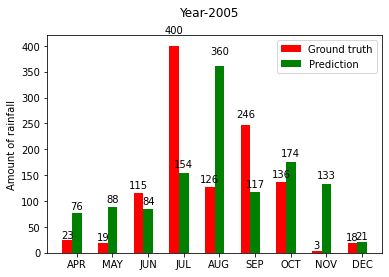

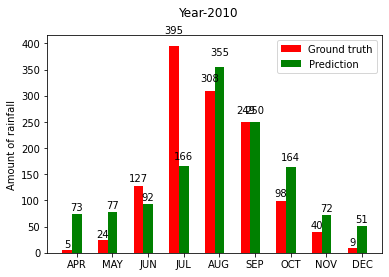

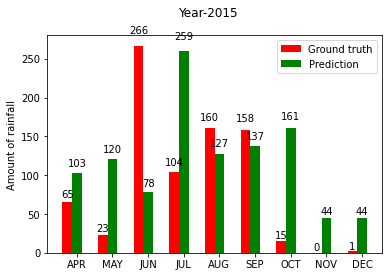

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [ ]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

127.1600615632603


MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.86310230416439
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601727
MEAN 2015
88.52222222222223 119.64752006738826
Standard deviation 2015
86.62446123324875 62.36355370163373


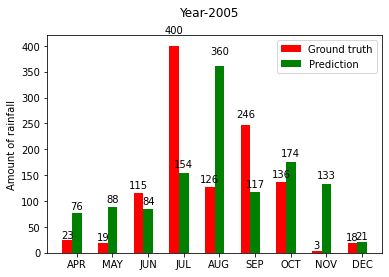

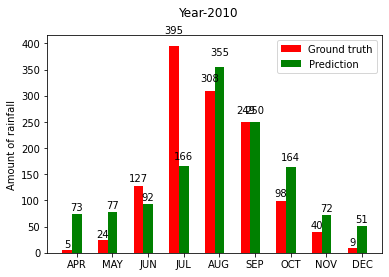

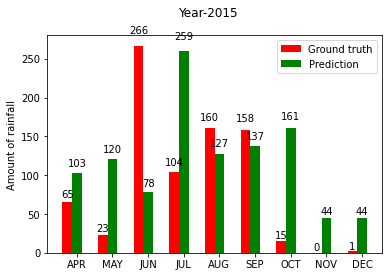

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])

In [ ]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 26945.2784 - mae: 97.0323 - val_loss: 17890.1602 - val_mae: 88.1075
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 18525.5414 - mae: 87.1000 - val_loss: 17749.3828 - val_mae: 86.6524
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 18061.8494 - mae: 85.7921 - val_loss: 17360.6230 - val_mae: 85.7767
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 18142.0193 - mae: 86.4000 - val_loss: 17774.5938 - val_mae: 83.0876
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 18171.5491 - mae: 86.1148 - val_loss: 17537.3301 - val_mae: 87.3356
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 18803.2152 - mae: 86.8497 - val_loss: 17379.2578 - val_mae: 85.4485
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 18196.9718 - mae: 85.6078 - val_loss: 17336.9199 - val_mae: 86.4315
Epoch 

MEAN 2005
121.2111111111111 134.68699821349804
Standard deviation 2005
123.77066107608005 90.86310230416439
MEAN 2010
139.93333333333334 144.80501326515912
Standard deviation 2010
135.71320250194282 95.94931363601727
MEAN 2015
88.52222222222223 119.64752006738826
Standard deviation 2015
86.62446123324875 62.36355370163373


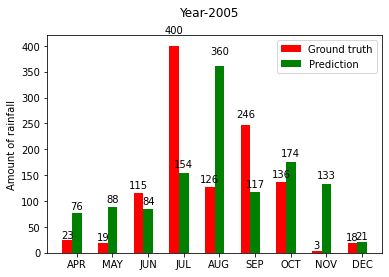

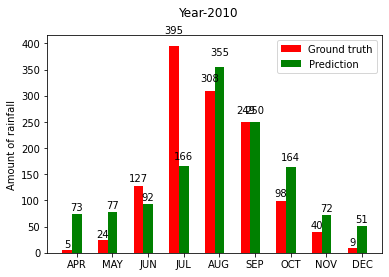

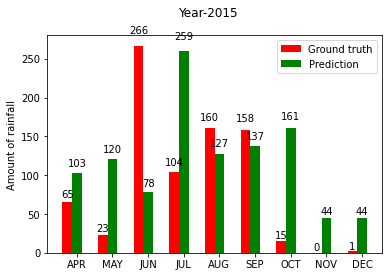

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [ ]:
# spliting training and testing data only for telangana
telangana = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['SUBDIVISION'] == 'TELANGANA'])

X = None; y = None
for i in range(telangana.shape[1]-3):
    if X is None:
        X = telangana[:, i:i+3]
        y = telangana[:, i+3]
    else:
        X = np.concatenate((X, telangana[:, i:i+3]), axis=0)
        y = np.concatenate((y, telangana[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [ ]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

64.72601914484643


MEAN 2005
121.2111111111111 106.49798150231582
Standard deviation 2005
123.77066107608005 76.08558540019236
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737333
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713268


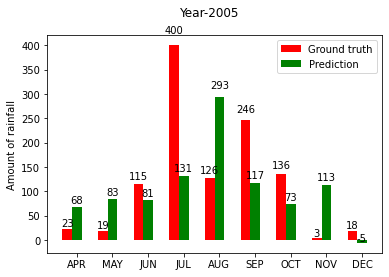

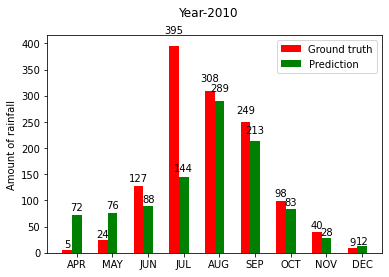

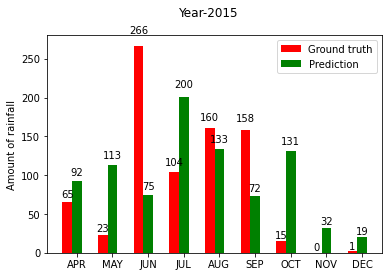

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [ ]:
from sklearn.svm import SVR

# SVM model
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

115.32415990638656


MEAN 2005
121.2111111111111 106.49798150231582
Standard deviation 2005
123.77066107608005 76.08558540019236
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737333
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713268


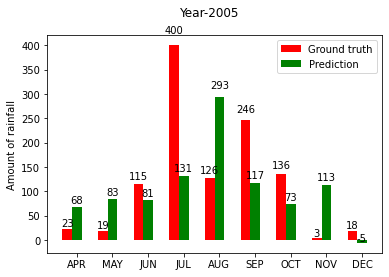

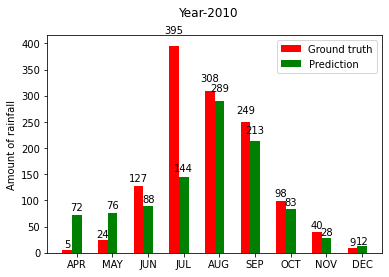

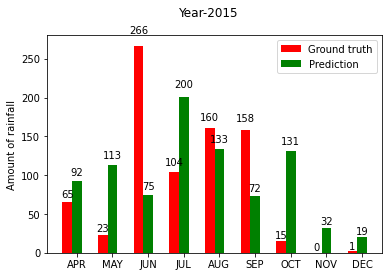

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [ ]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Epoch 1/10
15/15 [==============================] - 0s 11ms/step - loss: 7037.4707 - mae: 62.9064 - val_loss: 5312.7925 - val_mae: 54.0143
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 6395.3594 - mae: 58.2859 - val_loss: 4975.2026 - val_mae: 51.5392
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 6209.5186 - mae: 57.3911 - val_loss: 4819.8730 - val_mae: 51.5115
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 6108.6953 - mae: 57.8059 - val_loss: 4729.6904 - val_mae: 51.3701
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 6048.7666 - mae: 57.7512 - val_loss: 4627.3105 - val_mae: 50.6685
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 5974.6118 - mae: 56.8280 - val_loss: 4548.0083 - val_mae: 49.9109
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 5943.9883 - mae: 56.1772 - val_loss: 4464.0908 - val_mae: 49.2943
Epoch 8/10
15/15 [===============

MEAN 2005
121.2111111111111 106.49798150231582
Standard deviation 2005
123.77066107608005 76.08558540019236
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737333
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713268


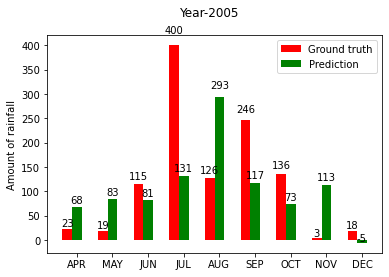

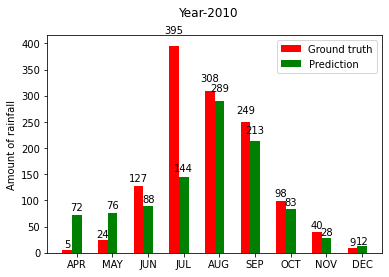

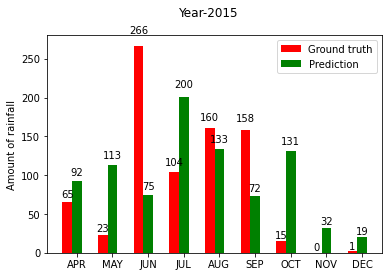

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")